
# Trabajo practico semana 1:
### Nicolas Pereyra

### Consigna:
1) Obtener la función transferencia V2/V1 ( módulo , fase y diagrama de polos y ceros).
2) ¿Qué tipo de filtro es?
3) Obtenga la función transferencia, pero normalizada. ¿Cuál sería en este caso la norma de frecuencia y qué interpretación circuital podría tener?
4) Simule la función transferencia normalizada (Python, Matlab, etc.).
5) Simule el circuito y obtenga la respuesta en frecuencia pedida en 1), para los valores:  R2/R1=1; R3=1kΩ y C=1µF
6) ¿Qué utilidad podría tener este tipo de circuitos?

# 1)
## Funcion transferecia:
\begin{equation}
H(s)= \frac{s-\frac{R2}{R1.R3.C1}}{s+\frac{1}{R3.C1}}
\end{equation}

## Modulo:
\begin{equation}
H(w)= \frac{\sqrt{w²+ (\frac{R2}{R1.R3.C1}})²}{\sqrt{w²+ (\frac{1}{R3.C1}})²}
\end{equation}


## Fase
\begin{equation}
\varphi(w)= arctan(\frac{-w.R1.R3.C1}{R2})-arctan(w.R3.C1)
\end{equation}


## Diagrama de polos y ceros:
Se graficaran variando la relacion R2/R1

(3, <Axes: xlabel='$\\sigma$', ylabel='j$\\omega$'>)

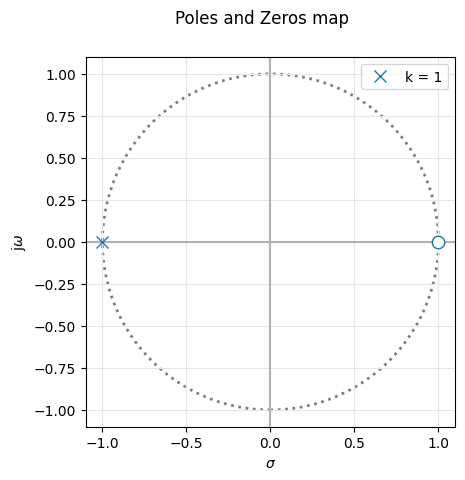

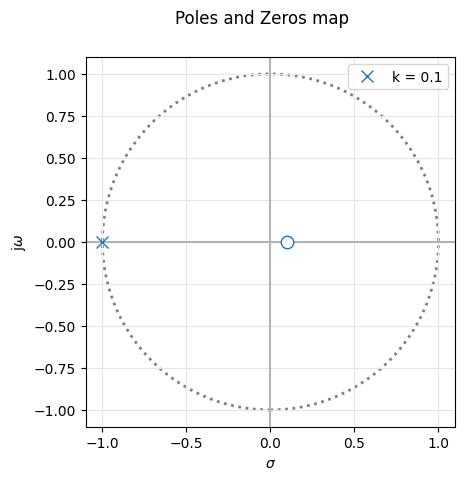

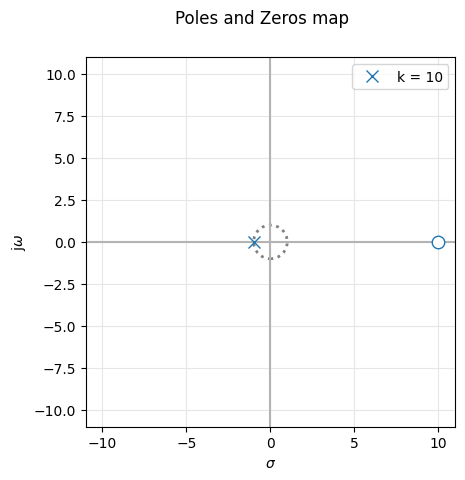

In [5]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Apr 12 16:35:49 2023

@author: nico
"""
# Librerías externas NumPy, SciPy y Matplotlib
from scipy.signal import TransferFunction
import matplotlib.pyplot as plt

# Librería de TC2, esta la vas a usar mucho
from pytc2.sistemas_lineales import pzmap, bodePlot


k1 = 1 # k = R2/R1 = 1
k2 = 0.1 # k = R2/R1 < 1
k3 = 10 # k = R2/R1 > 1

plt.close('all')


    
my_tf1 = TransferFunction( [1, -k1], [1, 1],) 
my_tf2 = TransferFunction( [1, -k2], [1, 1],) 
my_tf3 = TransferFunction( [1, -k3], [1, 1],) 

pzmap(my_tf1, fig_id=1, filter_description = ('k = '+str(k1))) #S plane pole/zero plot
pzmap(my_tf2, fig_id=2, filter_description = ('k = '+str(k2))) #S plane pole/zero plot
pzmap(my_tf3, fig_id=3, filter_description = ('k = '+str(k3))) #S plane pole/zero plot


# 2)
La funcion del filtro va a variar dependiendo el valor de R2/R1.
1) Si R2/R1 = 1 el filtro va a ser un Pasa Banda
2) Si R2/R1 < 1 el filtro va a ser un Pasa Altos
3) Si R2/R1 > 1 el filtro va a ser un Pasa Bajos


## 3)
### Funcion trasferecia normalizada por frecuecia:
\begin{equation}
H($)= \frac{$-\frac{R2}{R1}}{$+1}
\end{equation}

Siendo s igual a:
\begin{equation}
    s = $.w_d
\end{equation}

Y siendo la velocidad angular normalizada:
\begin{equation}
    w_d = \frac{1}{R3.C1}
\end{equation}


## 4)
(Los graficos se hicieron en un inicio con el spyder pero se tuvo un problema al simular en k = 1 y se simularon con el ltspice en esa situacion. Igualmente se mostraran los graficos generados por el spyder con su error en la magnitud)

# Grafico del modulo y fase:
## Spyder

(6,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

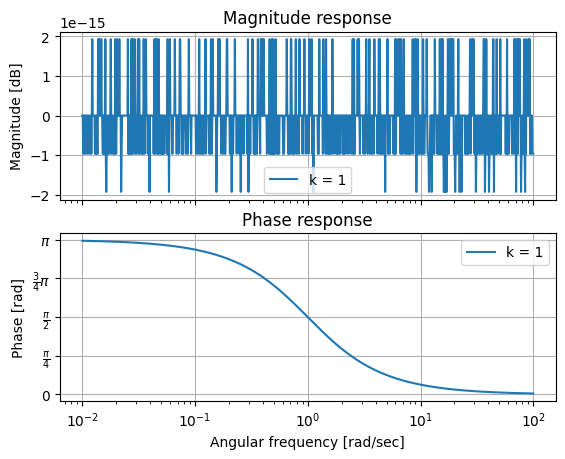

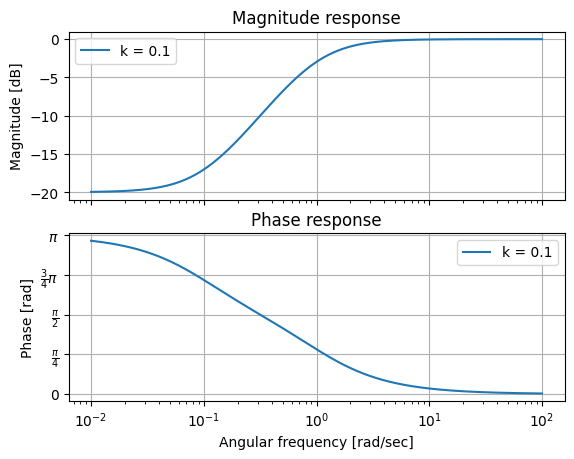

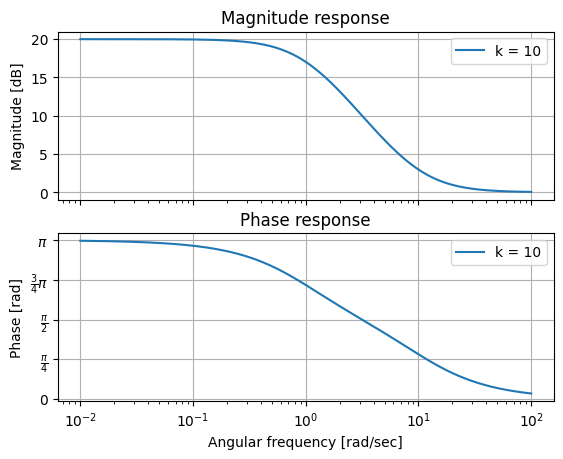

In [6]:
bodePlot(my_tf1, fig_id=4, filter_description = ('k = '+str(k1)))
bodePlot(my_tf2, fig_id=5, filter_description = ('k = '+str(k2)))
bodePlot(my_tf3, fig_id=6, filter_description = ('k = '+str(k3)))


# LTspice k = 1

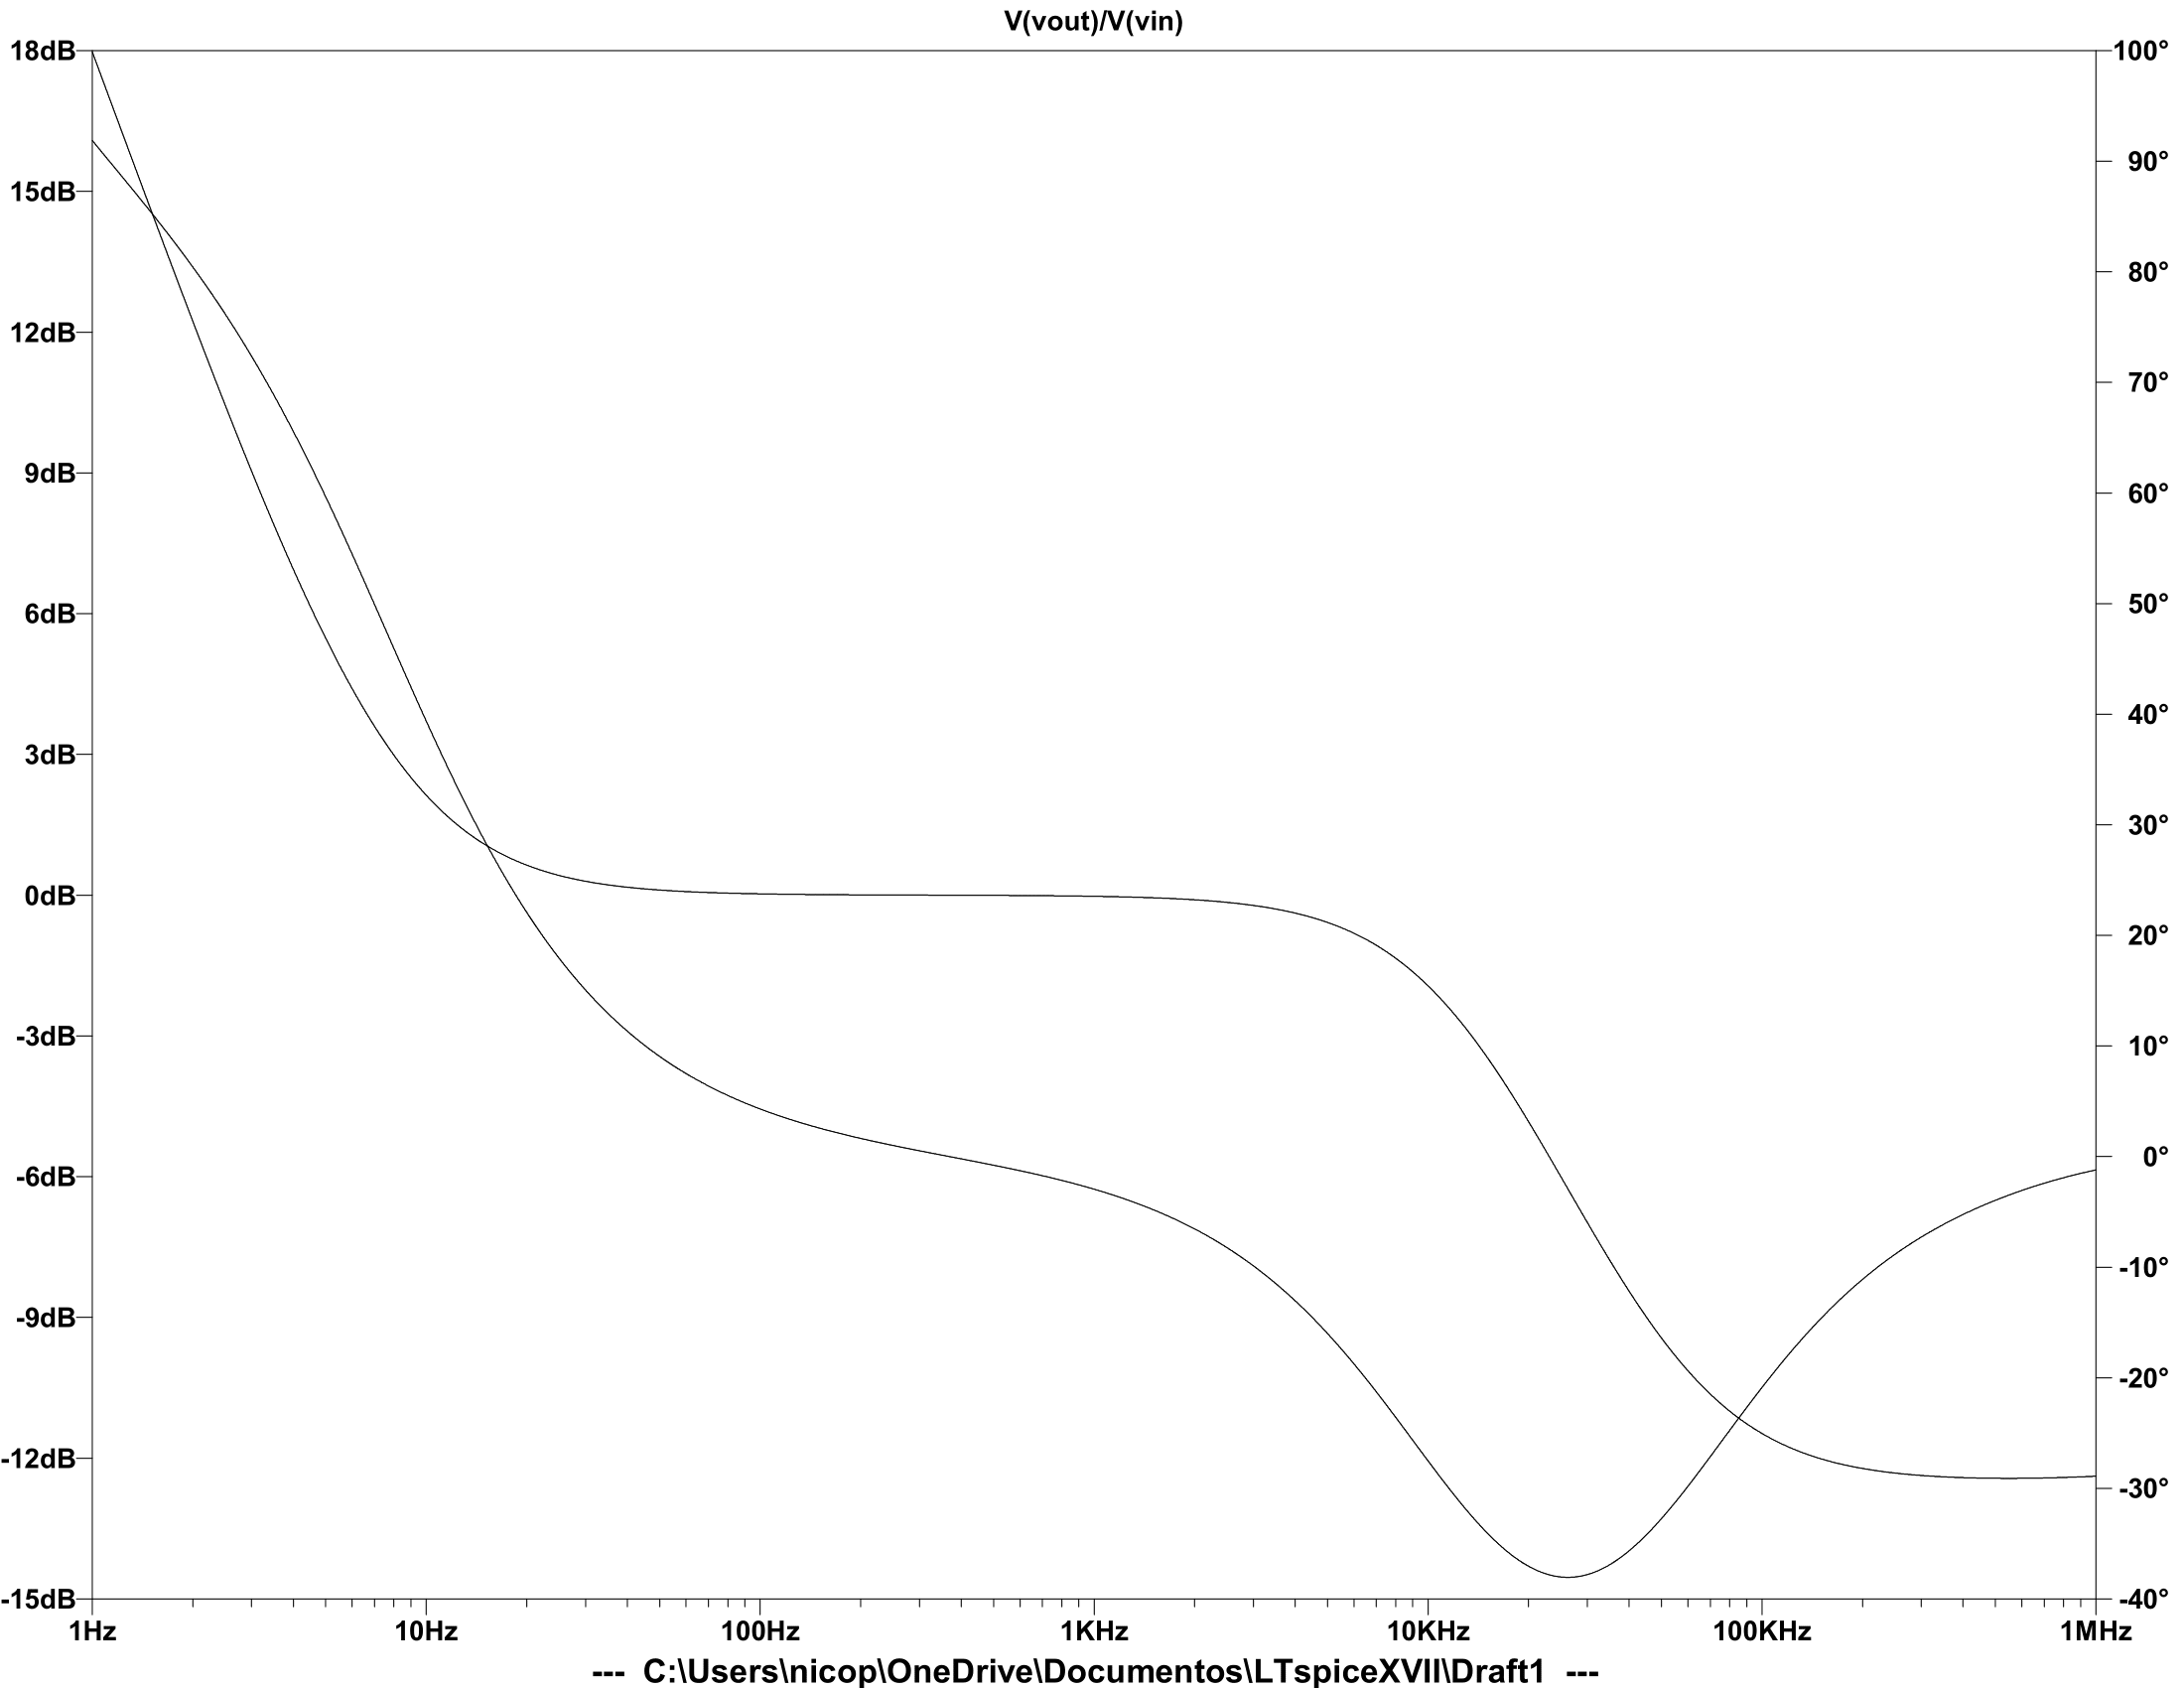

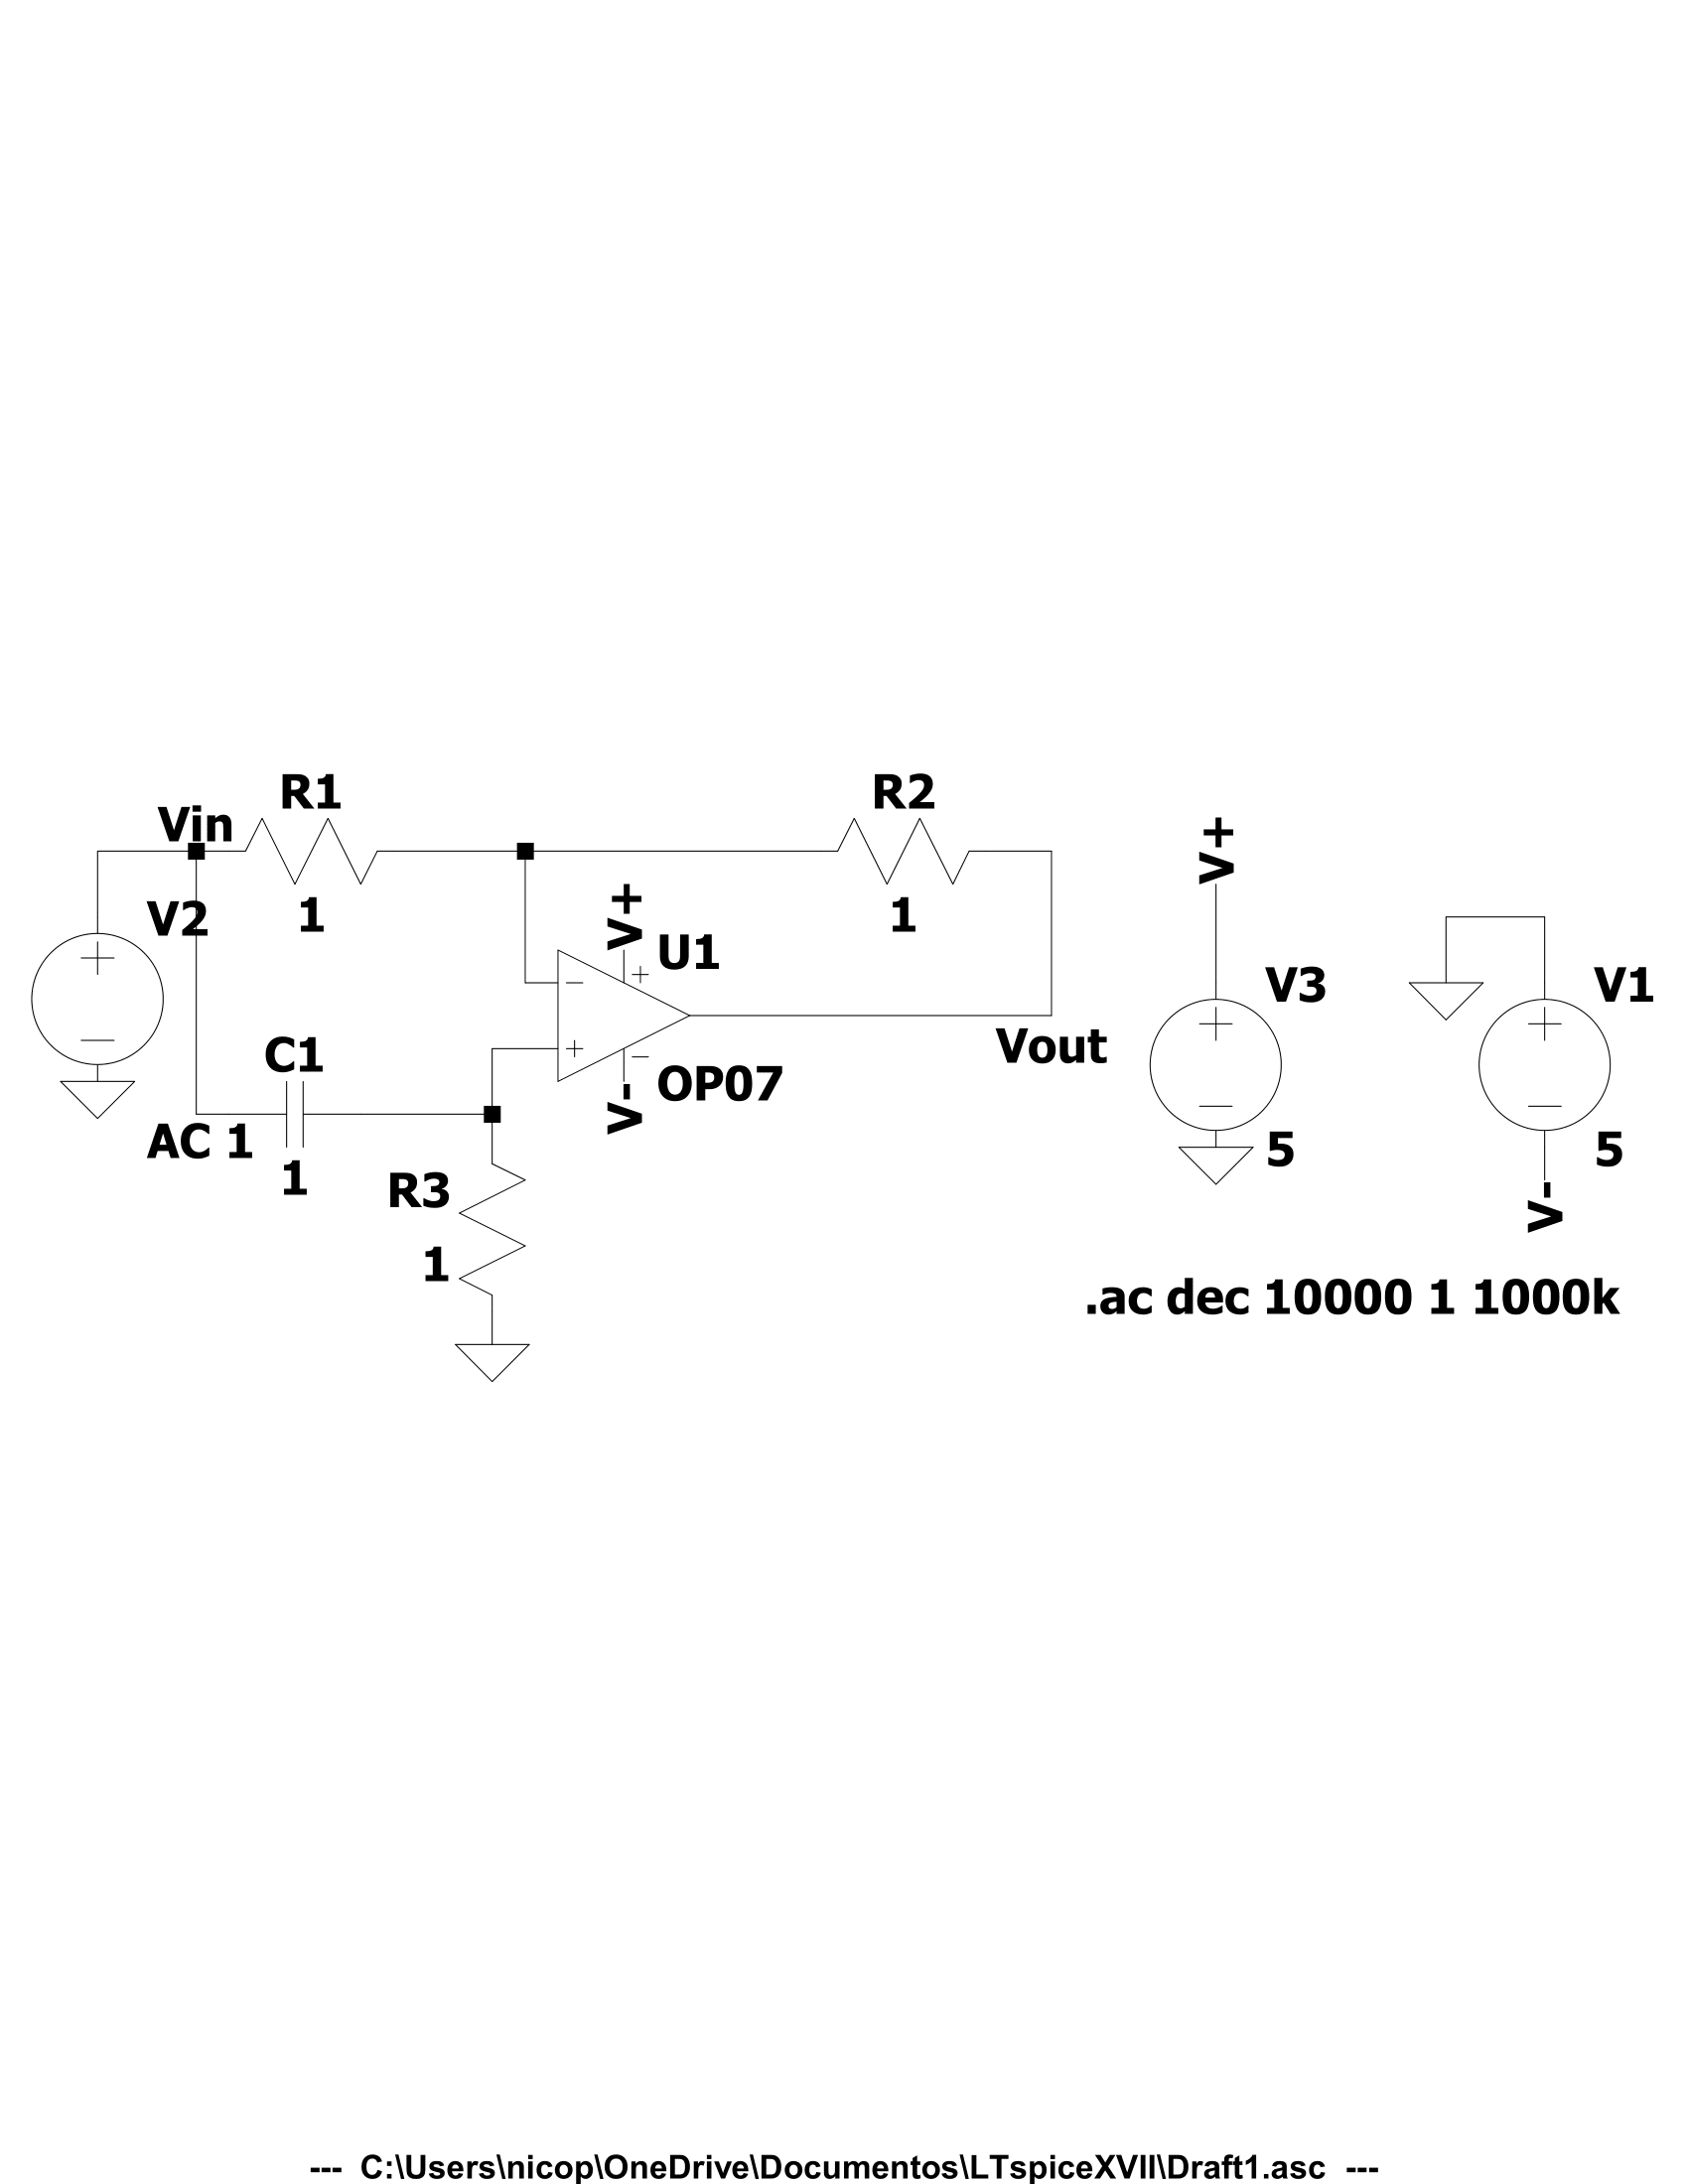

## 5)
### Simulacion con los valores dados
(R2/R1=1; R3=1kΩ y C=1µF)
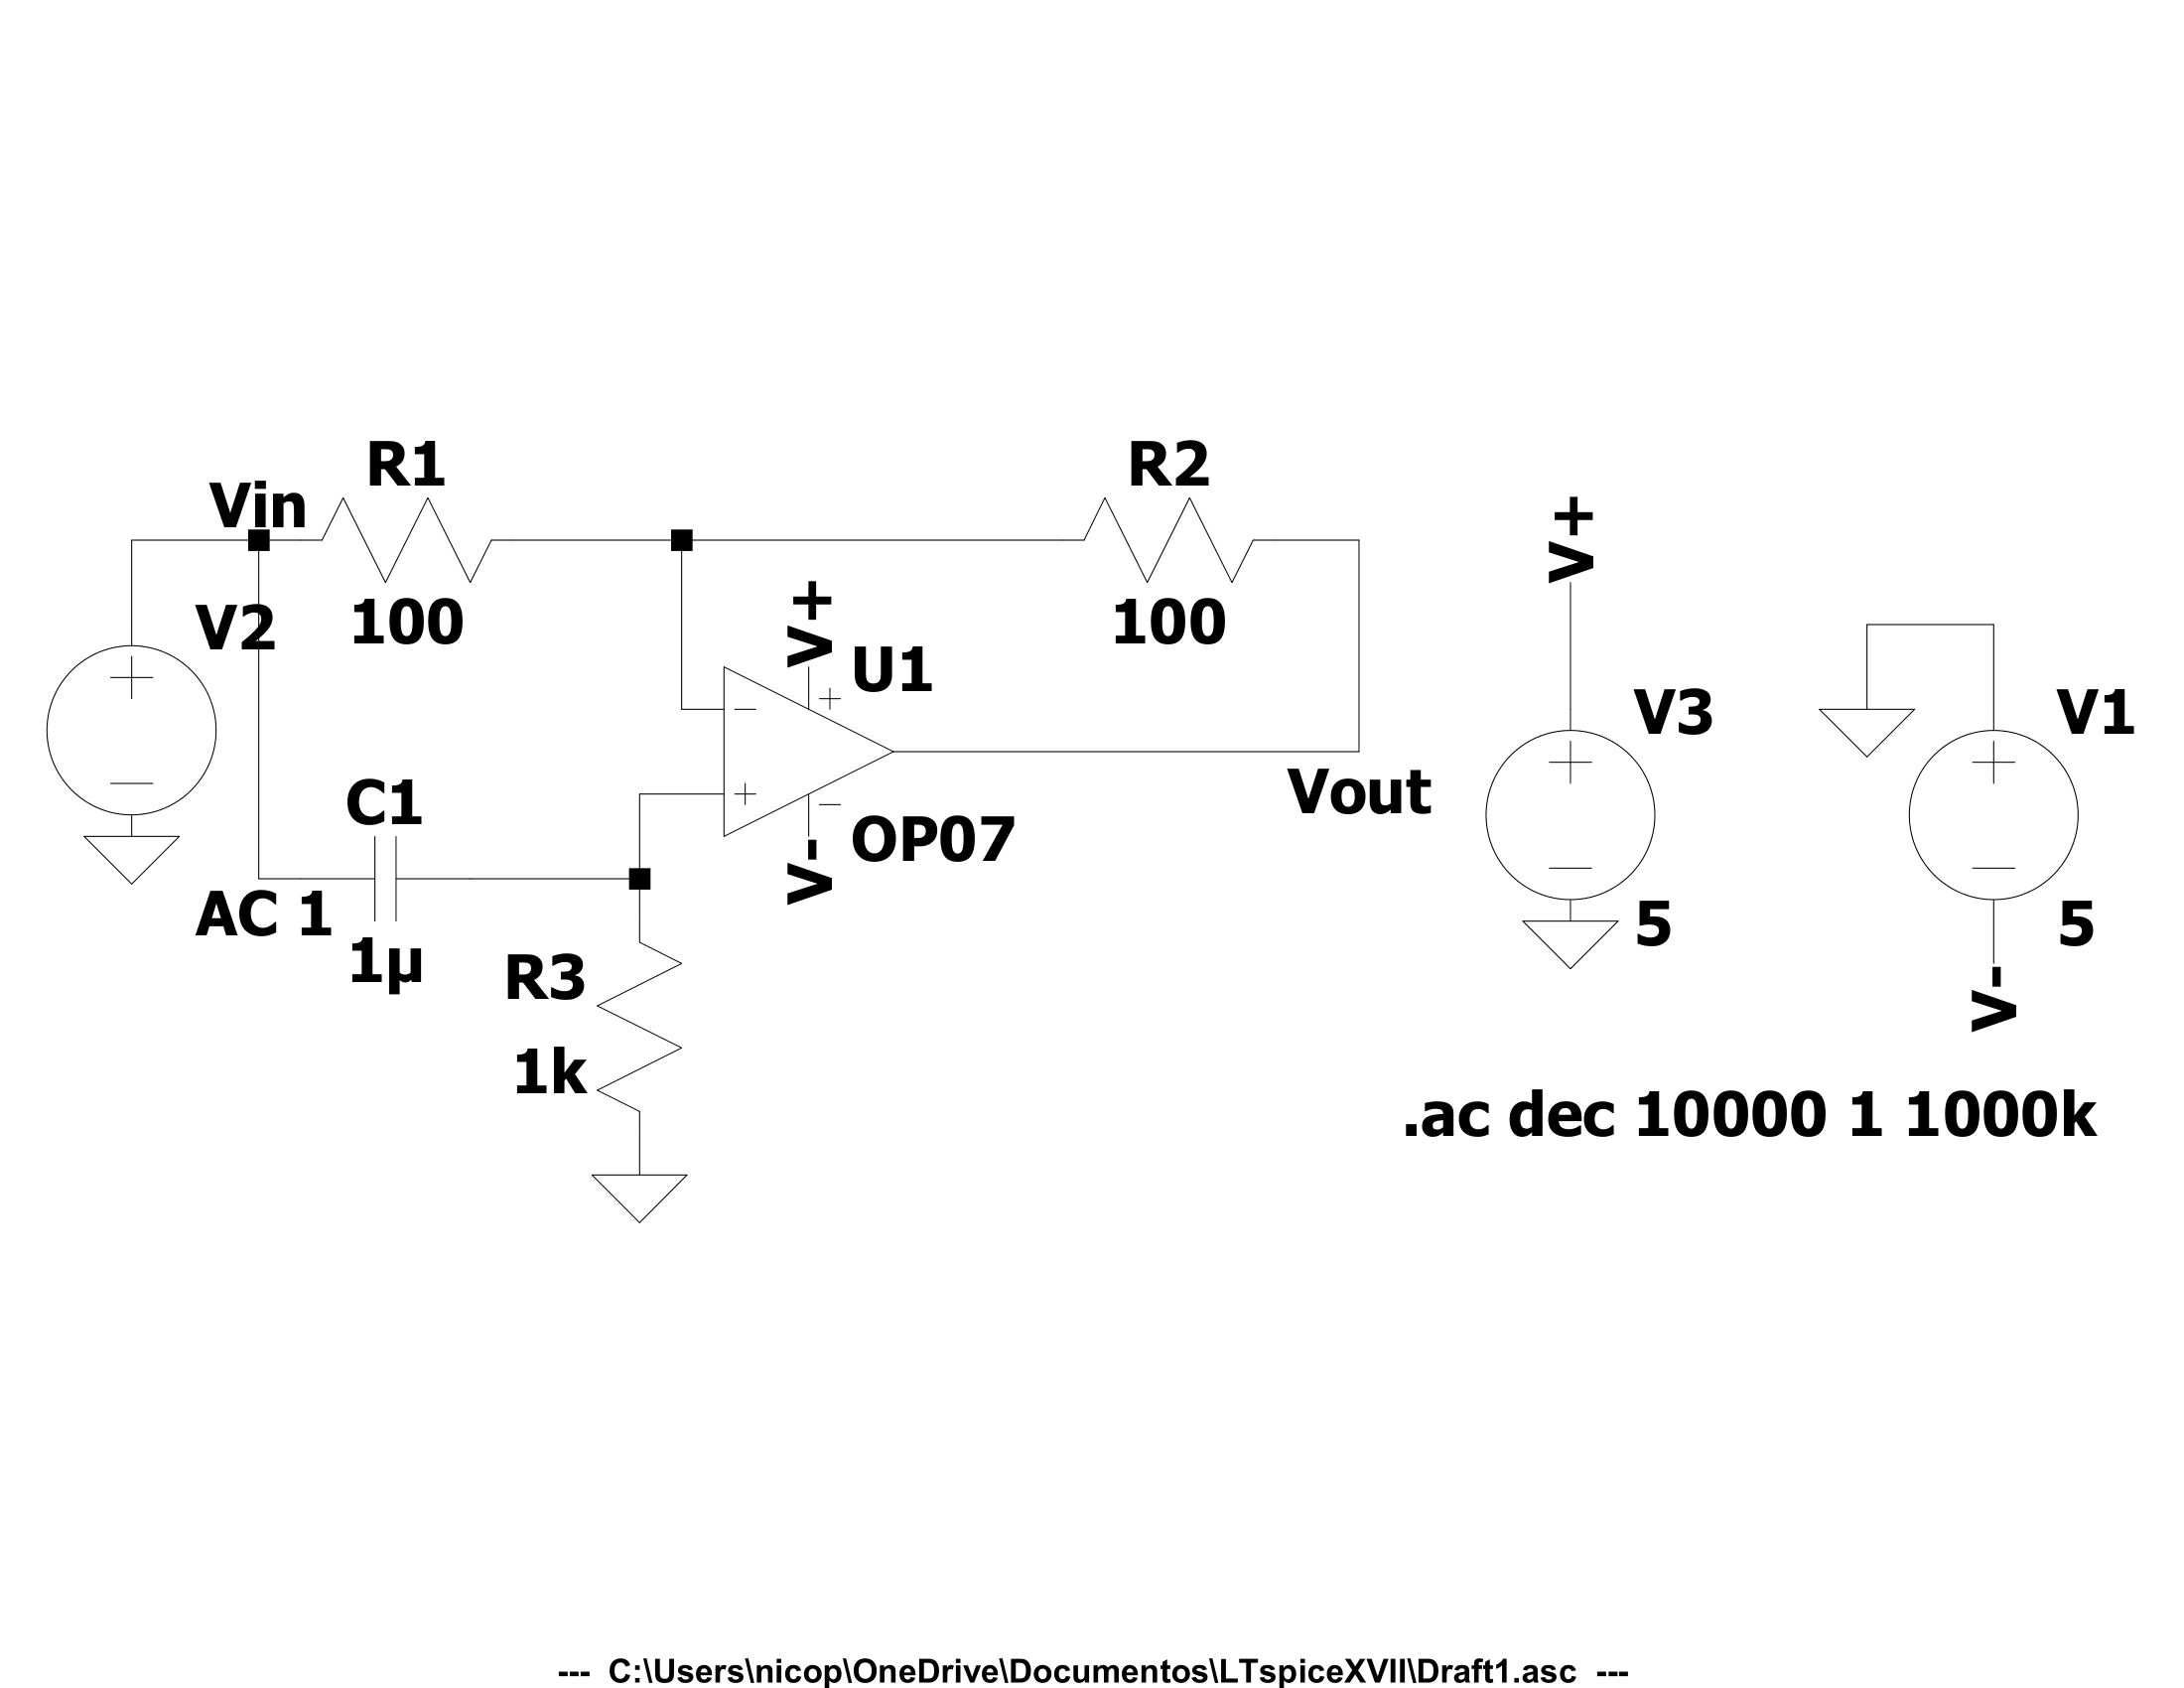



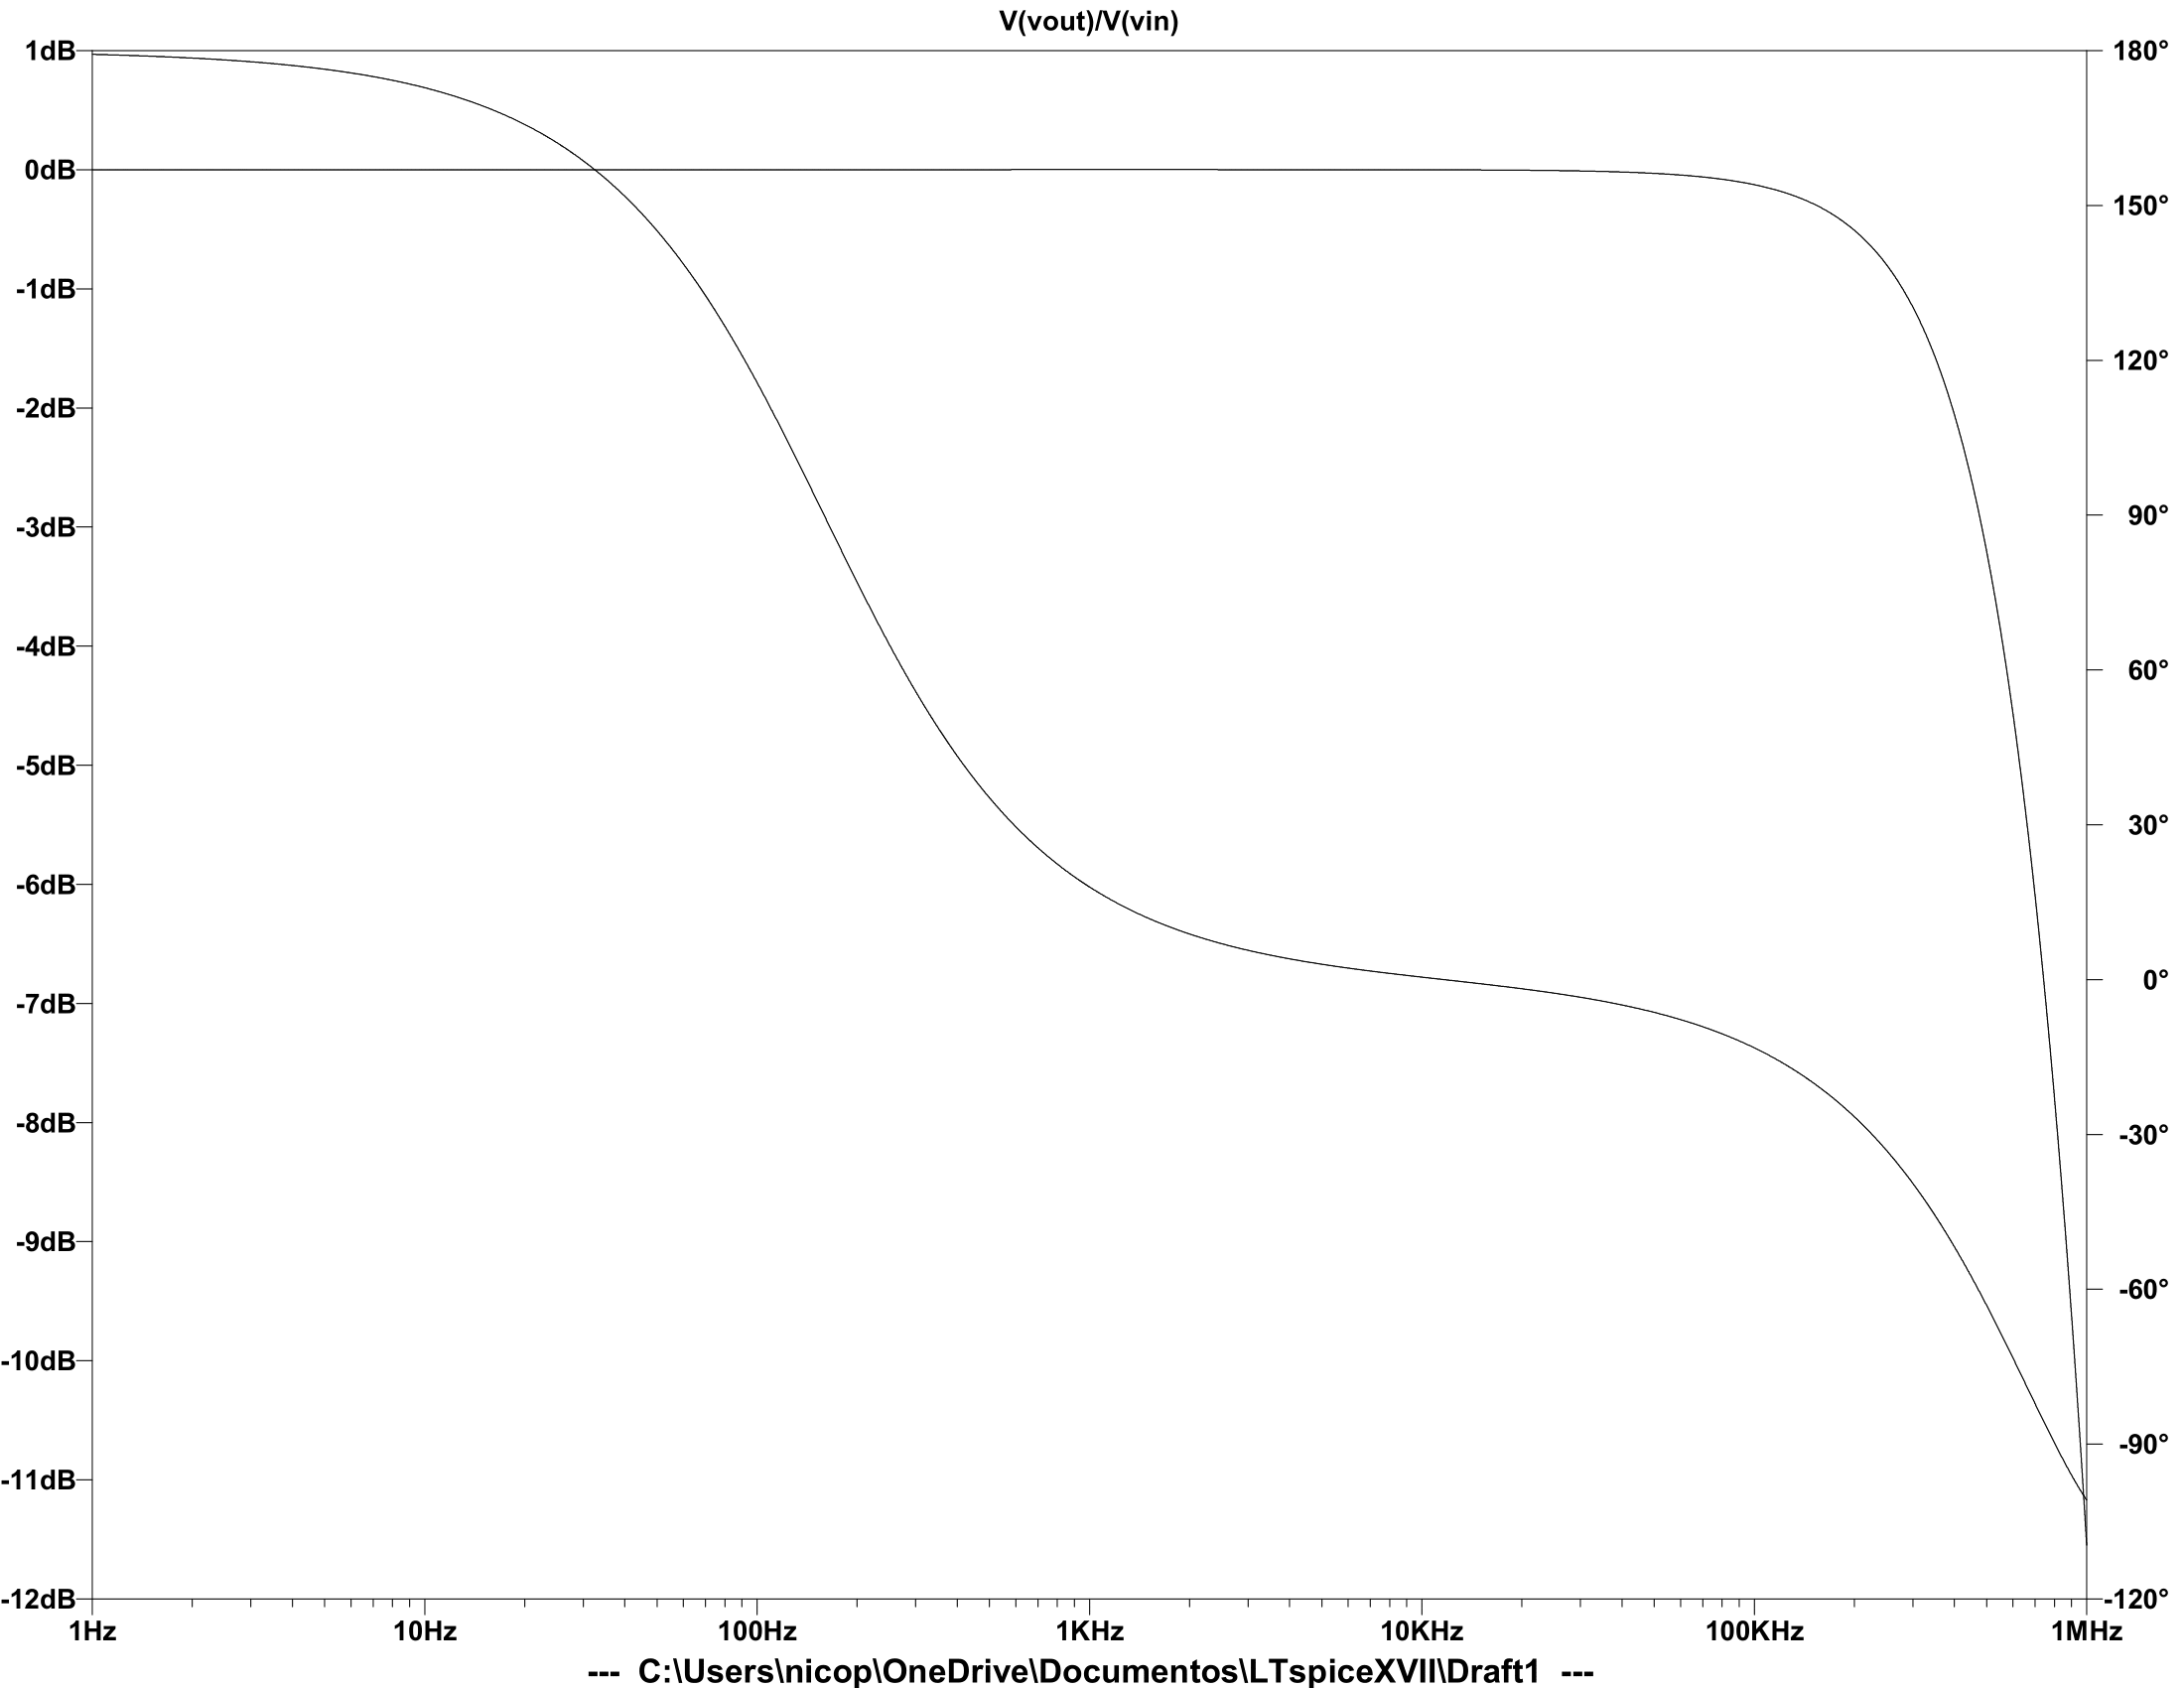